# Import Library

In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import re


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score, davies_bouldin_score


import matplotlib.pyplot as plt
from wordcloud import WordCloud


# NLP Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Load Data

In [4]:
df = pd.read_csv('/content/FAM_Malaysia.csv')

# Menghapus data duplikat pada kolom full_text
df = df.drop_duplicates(subset='full_text').reset_index(drop=True)
df.to_csv('FAM_Malaysia_NoDuplicate.csv', index=False)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1976326435020398607,Thu Oct 09 16:38:35 +0000 2025,1,FAM ni baik bubarkan je.. lagi bagus sukan bol...,1976326435020398607,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197632643502039...,202474881,NaN
1,1976321981038661782,Thu Oct 09 16:20:53 +0000 2025,5,Isu pendaftaran pemain yang melanda Persatuan ...,1976321981038661782,https://pbs.twimg.com/media/G21OXPRawAAQB7B.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197632198103866...,497665754,NaN
2,1976212107080462811,Thu Oct 09 15:41:03 +0000 2025,0,@PartaiSocmed FAM Malaysia aja kena skandal do...,1976311956152910130,NaN,PartaiSocmed,in,NaN,0,2,0,https://x.com/undefined/status/197631195615291...,1645925382347173888,NaN
3,1975738103169257515,Thu Oct 09 15:18:22 +0000 2025,0,@E_Blackbeard @FIFAcom @theafcdotcom @FAM_Mala...,1976306248602812738,NaN,E_Blackbeard,in,NaN,0,0,0,https://x.com/undefined/status/197630624860281...,767897318137790464,NaN
4,1976286690806464548,Thu Oct 09 15:07:56 +0000 2025,0,@idextratime Lagian FAM sama TMJ ngadi2. Padah...,1976303625812180994,NaN,idextratime,in,NaN,0,0,0,https://x.com/undefined/status/197630362581218...,1280767193240592384,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1975442072120549421,Tue Oct 07 06:04:26 +0000 2025,9,KENYATAAN MEDIA Kegagalan Pengesahan Dokumen P...,1975442072120549421,https://pbs.twimg.com/media/G2ouF6wagAAXa76.jpg,NaN,in,NaN,0,1,4,https://x.com/undefined/status/197544207212054...,339418611,NaN
999,1975350750810349916,Tue Oct 07 06:03:23 +0000 2025,0,@Pe_Enestee @kmkzboiz @theaseanball @NepalPres...,1975441807531253787,NaN,Pe_Enestee,in,NaN,0,1,0,https://x.com/undefined/status/197544180753125...,1720665183188922368,NaN
1000,1975441770097090800,Tue Oct 07 06:03:14 +0000 2025,30,Mesyuarat pengurus pasukan dan majlis undian b...,1975441770097090800,https://pbs.twimg.com/media/G2ot0fqaYAAICsM.jpg,NaN,in,NaN,2,13,3,https://x.com/undefined/status/197544177009709...,3191632944,NaN
1001,1975440898910806224,Tue Oct 07 05:59:46 +0000 2025,0,PETALING JAYA 7 Okt Hannah Yeoh selaku Menteri...,1975440898910806224,https://pbs.twimg.com/media/G2otBVqbIAImmja.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197544089891080...,1923654992722001922,NaN


# Text Preprocessing

In [8]:
def cleaning_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text


# Stopword removal dan stemming
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()


def preprocess(text):
  text = cleaning_text(text)
  tokens = text.split()
  tokens = [t for t in tokens if t not in stopwords]
  text = ' '.join(tokens)
  text = stemmer.stem(text)
  return text


# Terapkan preprocessing
df['clean_text'] = df['full_text'].apply(preprocess)
df.to_csv('FAM_Malaysia_clean.csv', index=False)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_text
0,1976326435020398607,Thu Oct 09 16:38:35 +0000 2025,1,FAM ni baik bubarkan je.. lagi bagus sukan bol...,1976326435020398607,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197632643502039...,202474881,NaN,fam ni baik bubar je bagus sukan bola sepak tu...
1,1976321981038661782,Thu Oct 09 16:20:53 +0000 2025,5,Isu pendaftaran pemain yang melanda Persatuan ...,1976321981038661782,https://pbs.twimg.com/media/G21OXPRawAAQB7B.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197632198103866...,497665754,NaN,isu daftar main landa satu bolasepak malaysia ...
2,1976212107080462811,Thu Oct 09 15:41:03 +0000 2025,0,@PartaiSocmed FAM Malaysia aja kena skandal do...,1976311956152910130,NaN,PartaiSocmed,in,NaN,0,2,0,https://x.com/undefined/status/197631195615291...,1645925382347173888,NaN,partaisocmed fam malaysia aja kena skandal dok...
3,1975738103169257515,Thu Oct 09 15:18:22 +0000 2025,0,@E_Blackbeard @FIFAcom @theafcdotcom @FAM_Mala...,1976306248602812738,NaN,E_Blackbeard,in,NaN,0,0,0,https://x.com/undefined/status/197630624860281...,767897318137790464,NaN,e blackbeard fifacom theafcdotcom fam malaysia...
4,1976286690806464548,Thu Oct 09 15:07:56 +0000 2025,0,@idextratime Lagian FAM sama TMJ ngadi2. Padah...,1976303625812180994,NaN,idextratime,in,NaN,0,0,0,https://x.com/undefined/status/197630362581218...,1280767193240592384,NaN,idextratime lagi fam sama tmj ngadi padahal ma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1975442072120549421,Tue Oct 07 06:04:26 +0000 2025,9,KENYATAAN MEDIA Kegagalan Pengesahan Dokumen P...,1975442072120549421,https://pbs.twimg.com/media/G2ouF6wagAAXa76.jpg,NaN,in,NaN,0,1,4,https://x.com/undefined/status/197544207212054...,339418611,NaN,nyata media gagal kesah dokumen main waris abi...
999,1975350750810349916,Tue Oct 07 06:03:23 +0000 2025,0,@Pe_Enestee @kmkzboiz @theaseanball @NepalPres...,1975441807531253787,NaN,Pe_Enestee,in,NaN,0,1,0,https://x.com/undefined/status/197544180753125...,1720665183188922368,NaN,pe enestee kmkzboiz theaseanball nepalpressnp ...
1000,1975441770097090800,Tue Oct 07 06:03:14 +0000 2025,30,Mesyuarat pengurus pasukan dan majlis undian b...,1975441770097090800,https://pbs.twimg.com/media/G2ot0fqaYAAICsM.jpg,NaN,in,NaN,2,13,3,https://x.com/undefined/status/197544177009709...,3191632944,NaN,mesyuarat urus pasu majlis undi johan futsal b...
1001,1975440898910806224,Tue Oct 07 05:59:46 +0000 2025,0,PETALING JAYA 7 Okt Hannah Yeoh selaku Menteri...,1975440898910806224,https://pbs.twimg.com/media/G2otBVqbIAImmja.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197544089891080...,1923654992722001922,NaN,petaling jaya okt hannah yeoh selaku menteri b...


# Feature Extraction (TF-IDF)

In [9]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_text'])
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13789 stored elements and shape (1003, 1000)>
  Coords	Values
  (0, 256)	0.034302705530627475
  (0, 624)	0.10712602639145119
  (0, 84)	0.5215375141041086
  (0, 156)	0.19729340258377184
  (0, 388)	0.27773103252156894
  (0, 79)	0.3794899455974833
  (0, 848)	0.35205805360859505
  (0, 145)	0.11323476294212091
  (0, 800)	0.25080215675462136
  (0, 931)	0.1185669852286335
  (0, 421)	0.3029445169088465
  (0, 774)	0.12296638149674577
  (0, 867)	0.10832359163151638
  (0, 105)	0.19729340258377184
  (0, 45)	0.2653960001027412
  (0, 614)	0.11118397232625862
  (0, 556)	0.03457717101275095
  (1, 256)	0.03532006263491365
  (1, 774)	0.12661334519447454
  (1, 556)	0.03560266827402475
  (1, 369)	0.162091095355537
  (1, 191)	0.19537247048713915
  (1, 542)	0.08983002313869966
  (1, 147)	0.1479683588504437
  (1, 389)	0.2077957990312857
  :	:
  (1001, 28)	0.18847631318235433
  (1001, 114)	0.23325727828903015
  (1001, 890)	0.2252808423338846
  (100

# Clustering dengan KMeans

In [12]:
jumlah_cluster = 2
kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)
cluster_label = kmeans.fit_predict(X_tfidf)

df['cluster_id'] = cluster_label
cluster_mean = (
    df.groupby('cluster_id')['clean_text']
    .apply(lambda x: x.str.len().mean())
)

sentimen_map = {
    cluster_mean.idxmax(): 'positif',
    cluster_mean.idxmin(): 'negatif'
}

df['sentimen'] = df['cluster_id'].map(sentimen_map)

print(df[['clean_text', 'sentimen']])
df.to_csv('05_hasil_clustering_sentimen.csv', index=False)

                                             clean_text sentimen
0     fam ni baik bubar je bagus sukan bola sepak tu...  positif
1     isu daftar main landa satu bolasepak malaysia ...  negatif
2     partaisocmed fam malaysia aja kena skandal dok...  negatif
3     e blackbeard fifacom theafcdotcom fam malaysia...  negatif
4     idextratime lagi fam sama tmj ngadi padahal ma...  negatif
...                                                 ...      ...
998   nyata media gagal kesah dokumen main waris abi...  negatif
999   pe enestee kmkzboiz theaseanball nepalpressnp ...  positif
1000  mesyuarat urus pasu majlis undi johan futsal b...  negatif
1001  petaling jaya okt hannah yeoh selaku menteri b...  negatif
1002  ycamdg theaseanball fam malaysia goblok jg kek...  negatif

[1003 rows x 2 columns]


# Evaluasi Clustering

In [13]:
sil_score = silhouette_score(X_tfidf, cluster_label)
db_score = davies_bouldin_score(X_tfidf.toarray(), cluster_label)


print(f'Silhouette Score : {sil_score:.4f}')
print(f'Davies-Bouldin Index : {db_score:.4f}')

Silhouette Score : 0.0108
Davies-Bouldin Index : 8.6222


# WordCloud

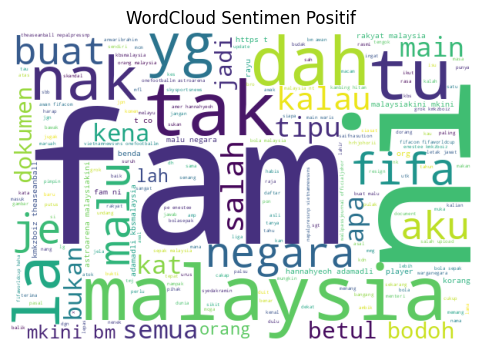

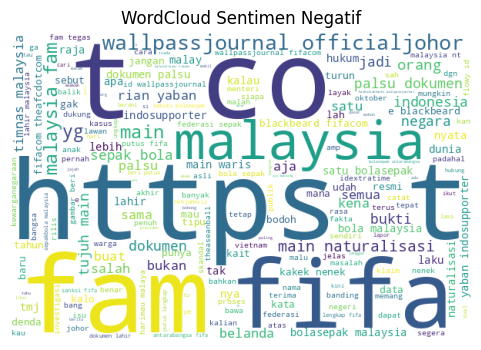

In [15]:
for label in ['positif', 'negatif']:
    # Ambil teks sesuai sentimen
    text_sentimen = ' '.join(df[df['sentimen'] == label]['clean_text'])

    # Hapus keyword "fam malaysia"
    text_sentimen = re.sub(r'\bfam\s+malaysia\b', '', text_sentimen, flags=re.IGNORECASE)

    wc = WordCloud(
        width=600,
        height=400,
        background_color='white'
    ).generate(text_sentimen)

    plt.figure(figsize=(6,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'WordCloud Sentimen {label.capitalize()}')
    plt.show()


# Topic Modeling menggunakan LDA

In [16]:
count_vectorizer = CountVectorizer(max_features=1000)
X_count = count_vectorizer.fit_transform(df['clean_text'])


jumlah_topik = 2
lda = LatentDirichletAllocation(n_components=jumlah_topik, random_state=42)
lda.fit(X_count)

LatentDirichletAllocation(n_components=2, random_state=42)

# Menampilkan Topik dan Kata Dominan

In [19]:
feature_names = count_vectorizer.get_feature_names_out()


def display_topics(model, feature_names, n_top_words=5):
  for topic_idx, topic in enumerate(model.components_):
    print(f'Topik {topic_idx + 1}:')
    print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print()


display_topics(lda, feature_names)

Topik 1:
['malaysia', 'fam', 'wallpassjournal', 'ni', 'yg']

Topik 2:
['fam', 'malaysia', 'fifa', 'https', 'co']



# Distribusi Topik Pada Data

In [21]:
topic_distribution = lda.transform(X_count)
df['dominant_topic'] = topic_distribution.argmax(axis=1)


print(df[['clean_text', 'dominant_topic']])

                                             clean_text  dominant_topic
0     fam ni baik bubar je bagus sukan bola sepak tu...               0
1     isu daftar main landa satu bolasepak malaysia ...               1
2     partaisocmed fam malaysia aja kena skandal dok...               1
3     e blackbeard fifacom theafcdotcom fam malaysia...               0
4     idextratime lagi fam sama tmj ngadi padahal ma...               0
...                                                 ...             ...
998   nyata media gagal kesah dokumen main waris abi...               1
999   pe enestee kmkzboiz theaseanball nepalpressnp ...               0
1000  mesyuarat urus pasu majlis undi johan futsal b...               1
1001  petaling jaya okt hannah yeoh selaku menteri b...               1
1002  ycamdg theaseanball fam malaysia goblok jg kek...               0

[1003 rows x 2 columns]
